# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../result_data/weather.csv"


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)



## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


In [4]:
# set up list to hold  info
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Set the record count and the set count
record_count = 0
set_count = 1

print("Beginning Data Retrieval\n-----------------------------")

#Loop throught the list of cities and append them to the above created list.
# Also check the record count and if it's 50 then increase the set count.

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        city_name.append(city)
        print(f"Processing Record {record_count} of Set {set_count} | {city}")
        if record_count > 49:
                record_count = 1
                set_count +=1 
        else:
            record_count += 1
            
    except (KeyError, IndexError):
        print("City not found. Skipping...")
            
print("-----------------------------\nData Retrieval Complete\n-----------------------------")          

    
        
    

Beginning Data Retrieval
-----------------------------
Processing Record 0 of Set 1 | severo-kurilsk
Processing Record 1 of Set 1 | corn island
Processing Record 2 of Set 1 | kapaa
Processing Record 3 of Set 1 | bahia blanca
Processing Record 4 of Set 1 | ahome
Processing Record 5 of Set 1 | kampong cham
Processing Record 6 of Set 1 | khatanga
Processing Record 7 of Set 1 | qaanaaq
Processing Record 8 of Set 1 | langham
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | bambous virieux
City not found. Skipping...
Processing Record 11 of Set 1 | san blas
Processing Record 12 of Set 1 | lagoa
Processing Record 13 of Set 1 | victoria
Processing Record 14 of Set 1 | oum hadjer
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | east london
Processing Record 18 of Set 1 | faanui
Processing Record 19 of Set 1 | neiafu
Processing Record 20 of Set 1 | najran
Processing Record 21 of Set 1 | guerrero negro
Proc

Processing Record 37 of Set 4 | ekibastuz
Processing Record 38 of Set 4 | vardo
Processing Record 39 of Set 4 | rio claro
Processing Record 40 of Set 4 | muros
Processing Record 41 of Set 4 | port elizabeth
City not found. Skipping...
Processing Record 42 of Set 4 | north platte
Processing Record 43 of Set 4 | pisco
Processing Record 44 of Set 4 | santa rosa
Processing Record 45 of Set 4 | port hardy
Processing Record 46 of Set 4 | shafranovo
Processing Record 47 of Set 4 | elizabeth city
Processing Record 48 of Set 4 | kuytun
Processing Record 49 of Set 4 | dudinka
Processing Record 50 of Set 4 | nelson bay
City not found. Skipping...
Processing Record 1 of Set 5 | esperance
Processing Record 2 of Set 5 | bluefields
City not found. Skipping...
City not found. Skipping...
Processing Record 3 of Set 5 | enugu
Processing Record 4 of Set 5 | acarau
Processing Record 5 of Set 5 | constitucion
Processing Record 6 of Set 5 | cidreira
Processing Record 7 of Set 5 | nyurba
Processing Record 8 

Processing Record 27 of Set 8 | mirabad
Processing Record 28 of Set 8 | keetmanshoop
Processing Record 29 of Set 8 | kirsanov
Processing Record 30 of Set 8 | byron bay
Processing Record 31 of Set 8 | quatre cocos
Processing Record 32 of Set 8 | ostrovnoy
Processing Record 33 of Set 8 | mersing
Processing Record 34 of Set 8 | toguchin
Processing Record 35 of Set 8 | muramatsu
City not found. Skipping...
Processing Record 36 of Set 8 | salta
Processing Record 37 of Set 8 | sechura
Processing Record 38 of Set 8 | matara
Processing Record 39 of Set 8 | shimoda
Processing Record 40 of Set 8 | haines junction
Processing Record 41 of Set 8 | bilma
Processing Record 42 of Set 8 | blagoyevo
Processing Record 43 of Set 8 | acari
Processing Record 44 of Set 8 | yetkul
Processing Record 45 of Set 8 | rosarito
Processing Record 46 of Set 8 | teacapan
Processing Record 47 of Set 8 | nichinan
Processing Record 48 of Set 8 | posse
City not found. Skipping...
Processing Record 49 of Set 8 | varhaug
Pro

Processing Record 15 of Set 12 | sampit
Processing Record 16 of Set 12 | taoudenni
City not found. Skipping...
Processing Record 17 of Set 12 | sardarshahr
Processing Record 18 of Set 12 | price
Processing Record 19 of Set 12 | agadir
Processing Record 20 of Set 12 | katubao
Processing Record 21 of Set 12 | cairns
Processing Record 22 of Set 12 | bandarbeyla
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a Data Frame from cities, cloudiness, country, ...
weather_dict = { "City" : city_name, "Cloudiness" : cloudiness,"Country" : country, "Date" : date, 
                "Humidity": humidity, "Lat" : lat , "Lng" : lng, "Max Temp" : max_temp , "Wind Speed": wind_speed}
weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City          573
Cloudiness    573
Country       573
Date          573
Humidity      573
Lat           573
Lng           573
Max Temp      573
Wind Speed    573
dtype: int64

In [7]:
#Export the city data into a .csv.
weather_data.to_csv(output_data_file , encoding="utf-8", index=False)

In [8]:
#Display the DataFrame
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,severo-kurilsk,100,RU,1580372527,87,50.68,156.12,16.30,3.53
1,corn island,54,NI,1580372527,71,12.17,-83.04,79.39,10.60
2,kapaa,20,US,1580372462,83,22.08,-159.32,69.80,8.05
3,bahia blanca,0,AR,1580372525,37,-38.72,-62.27,57.47,16.69
4,ahome,0,MX,1580372528,94,25.92,-109.18,57.99,3.00


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [9]:
# Convert Time Stamp to regular date
weather_date = datetime.datetime.fromtimestamp(int(weather_data["Date"][0])).strftime('%m/%d/%Y')

#### Latitude vs. Temperature Plot

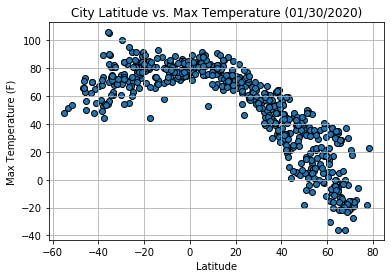

In [10]:
# Build a scatter plot for each data type

plt.scatter(weather_data["Lat"],weather_data["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (" + weather_date + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.grid (b=True)
plt.savefig("../result_data/Lat vs Temp.png")
plt.show()

We can conclude that there is a relationship between temperature and latitude. As expected, the temperature increases hence weather becomes warmer as one approaches the equator (0 Deg. Latitude) and weather becomes colder as we move away from equator.  
The southern hemisphere is warmer than the northern hemisphere at this time of year.

#### Latitude vs. Humidity Plot

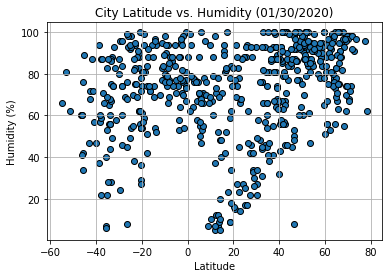

In [11]:
# Build a scatter plot for each data type

plt.scatter(weather_data["Lat"],weather_data["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (" + weather_date + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (b=True)
plt.savefig("../result_data/Lat vs Humidity.png")
plt.show()

It seems there is no such relationship between Latitude and Humidity. Most of the cities have humidity between 65% and 95% though at this time.

#### Latitude vs. Cloudiness Plot

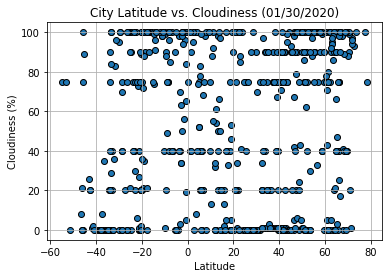

In [12]:
# Build a scatter plot for each data type

plt.scatter(weather_data["Lat"],weather_data["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (" + weather_date + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-5,105)
plt.grid (b=True)
plt.savefig("../result_data/Lat vs Cloudiness.png")
plt.show()

The data is widely spread out so we can conclude that there is no relationship between Latitude and Cloudiness. 

#### Latitude vs. Wind Speed Plot

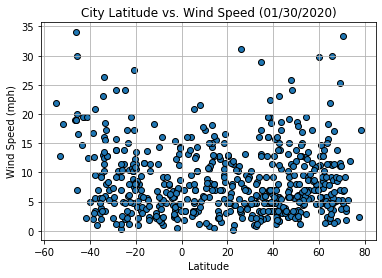

In [13]:
# Build a scatter plot for each data type

plt.scatter(weather_data["Lat"],weather_data["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (" + weather_date + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.grid (b=True)
plt.savefig("../result_data/Lat vs WindSpeed.png")
plt.show()

It seems there is no relationship between Latitude and Wind speed. Mostly wind speed is between 0 to 20 mph.

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

# Create a function to create Linear Regression plots, give r**2 value and save it as .png file.
# Here there are three parameters x_values, y_values and the .png file name

def linear_regression(x_values,y_values,fig_name):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, (min(x_values),min(y_values)),fontsize=15,color="red")
    plt.xlabel('Latitude')
    print(f"The r value is: {rvalue}")
    print(f"The r-squared is: {rvalue**2}")
    plt.savefig(f"../result_data/{fig_name}.png")
    return(plt.show())


In [15]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_data.loc[weather_data["Lat"].astype(float) >= 0]
southern_df = weather_data.loc[weather_data["Lat"].astype(float) < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: -0.8939667797850814
The r-squared is: 0.7991766033593083


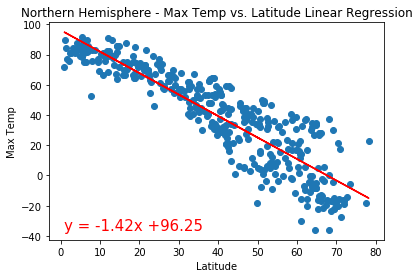

In [16]:
plt.ylabel('Max Temp')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
linear_regression(northern_df["Lat"], northern_df["Max Temp"],"North Temp Vs Lat")

The r value is -0.89 that means there is a strong negative correlation between Northern hemisphere's Max Temperature and Latitude. We can conclude that as the latitude increases the maximum temperature decreases in the northern hemisphere.   
The r squared value is 0.799. Therfore, the linear regression model is a good fit  and  approximately 80% of the observed variation can be explained by the model's inputs.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r value is: 0.4319926366415849
The r-squared is: 0.1866176381125484


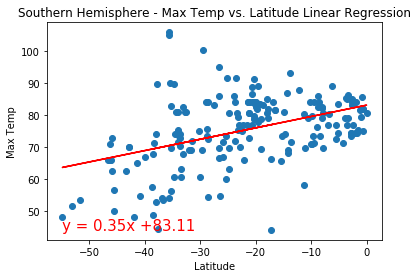

In [17]:
plt.ylabel('Max Temp')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
linear_regression(southern_df["Lat"], southern_df["Max Temp"],"South Temp Vs Lat")


The r-value 0.43 represents a weak positive correlation between Southern Hemisphere's Max Temperature and Latitude.  

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: 0.4294253883024754
The r-squared is: 0.18440616411873179


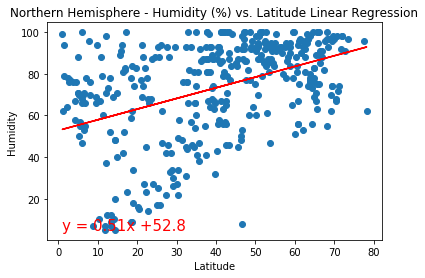

In [18]:
plt.ylabel("Humidity")
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
linear_regression(northern_df["Lat"], northern_df["Humidity"],"North Humidity vs Lat")

The r-value 0.429 represents a weak positive correlation between Northern Hemisphere's Humidity(%) and Latitude.  
From r-squared value we can conclude that the linear regression model is not a good fit.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r value is: 0.3493382234450569
The r-squared is: 0.1220371943597485


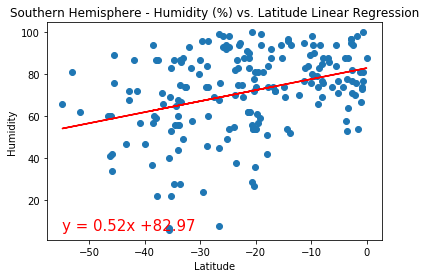

In [19]:
plt.ylabel("Humidity")
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
linear_regression(southern_df["Lat"], southern_df["Humidity"], "South Humidity vs Lat")

The r-value 0.349 represents a very weak positive correlation between Southern Hemisphere's Humidity(%) and Latitude.  
From r-squared value we can conclude that the linear regression model is not a good fit.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: 0.21791431630419428
The r-squared is: 0.047486649250324434


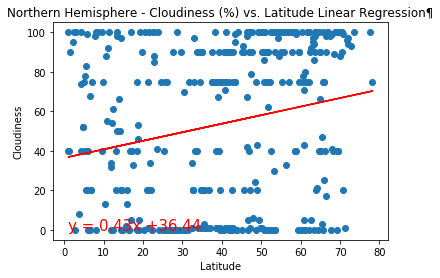

In [20]:
plt.ylabel("Cloudiness")
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression¶')
linear_regression(northern_df["Lat"], northern_df["Cloudiness"],"North Cloudiness vs Lat")

The r-value 0.2179 represents a weak positive correlation between Northern Hemisphere's Cloudiness(%) and Latitude.  
From r-squared value we can conclude that the linear regression model is not a good fit.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r value is: 0.4124881853220206
The r-squared is: 0.1701465030302536


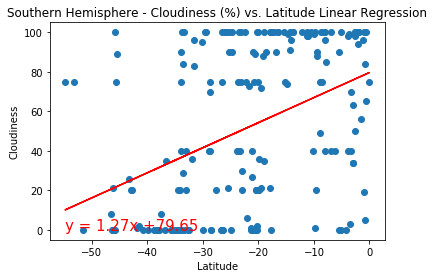

In [21]:
plt.ylabel("Cloudiness")
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
linear_regression(southern_df["Lat"], southern_df["Cloudiness"], "South Cloudiness vs Lat")

The r-value 0.412 represents a very weak positive correlation between Southern Hemisphere's Cloudiness(%) and Latitude.   
From r-squared value we can conclude that the linear regression model is not a good fit.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: 0.04173943776542244
The r-squared is: 0.0017421806649735728


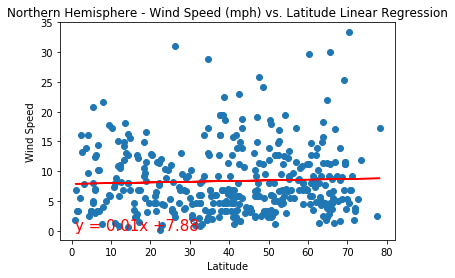

In [22]:
plt.ylabel("Wind Speed")
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
linear_regression(northern_df["Lat"], northern_df["Wind Speed"], "North Wind Speed vs Lat")

The r-value 0.0417 represents a very weak positive correlation between Northern Hemisphere's Wind Speed(mph) and Latitude.   
From r-squared value we can conclude that the linear regression model is not a very good fit.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r value is: -0.4038645945122703
The r-squared is: 0.1631066107005605


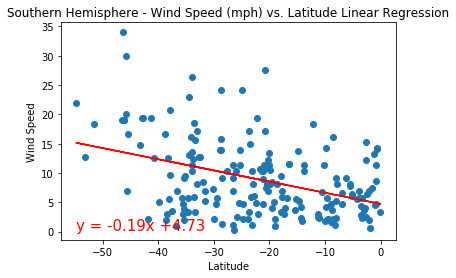

In [23]:
plt.ylabel("Wind Speed")
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
linear_regression(southern_df["Lat"], southern_df["Wind Speed"],"South Wind Speed vs Lat")

The r-value -0.40386 represents a weak negative correlation between Southern Hemisphere's Wind Speed(mph) and Latitude.   
From r-squared value we can conclude that the linear regression model is not a good fit.